# Exploring Relationships

Contents

1) Import libraries and data set

2) Correlation matrix using pandas

3) Correlation matrix heatmap

4) Correlation heat map using seaborn

5) Scatterplots

6) Pair plots

7) Categorical plot

8) Insights

# 1) Import necessary libraries and data set

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import os

In [4]:
# Turn project folder path into a string

path = r'/Users/giorjeanmutuc/AirBNB NYC'

In [5]:
# Import data

df_clean = pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'AB_NYC_clean.csv'), index_col = 0)

In [64]:
# Check columns in df_clean

df_clean.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price category
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Mid price
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Mid price
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Mid price
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Low price
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Low price


In [7]:
# Remove columns 

df_2 = df_clean.drop(columns = ['id','neighbourhood_group','neighbourhood','host_id','last_review'])

# 2) Correlation matrix using pandas

In [8]:
# Create a correlation matrix using pandas

df_2.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


# 3) Correlation matrix heatmap

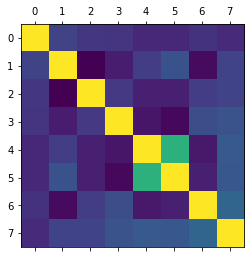

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix for AirBNB NYC 2019')

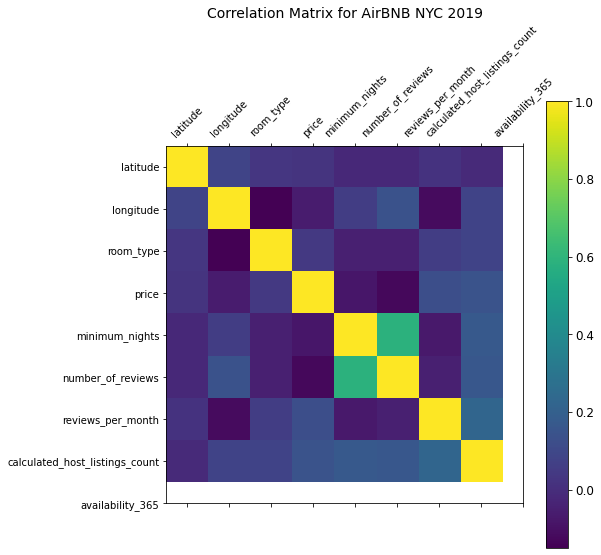

In [7]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) 
plt.matshow(df_2.corr(), fignum=f.number) 
plt.xticks(range(df_2.shape[1]), df_2.columns, fontsize=10, rotation=45) 
plt.yticks(range(df_2.shape[1]), df_2.columns, fontsize=10) 
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix for AirBNB NYC 2019', fontsize=14) 


# 4) Correlation heat map using seaborn

Text(0.5, 1.0, 'Correlation Matrix for AirBNB NYC 2019')

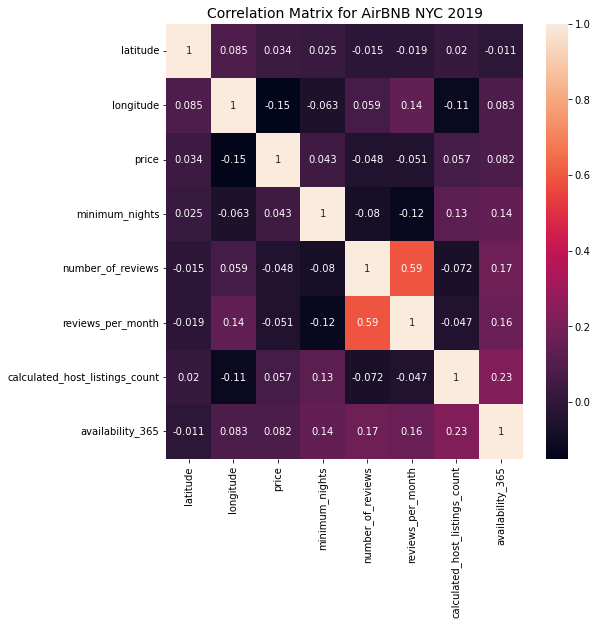

In [8]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df_2.corr(), annot = True, ax = ax) 
plt.title('Correlation Matrix for AirBNB NYC 2019', fontsize=14) 

# Answer to question 3 

Based on the results, most variables do not have any correlation with the exception of number_of_reviews and reviews_per_month. A few variables showed weak positive correlation. Perhaps linear interdependence isn't the most relevant tool to gauge the interconnectedness of the variables in this dataset. 

# 5) Scatterplots

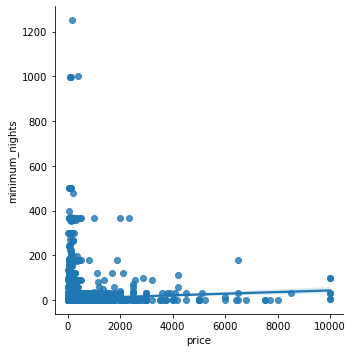

In [9]:
# Create a scatterplot for the "price" and "minimum_nights" columns in seaborn

sns.lmplot(x = 'price', y = 'minimum_nights', data = df_2)

# Answer to Question 4

Price and minimum_nights have strong linear negative relationship. As prices drop, the minimun_nights increase. Also significant to note the three outliers that have gone beyond the mean and median number of nights. It's worth exploring what could have caused the outliers. 

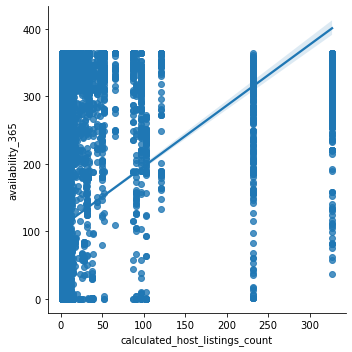

In [13]:
# Create a scatterplot for the "availability_365" and "calculated_host_listings_count" columns in seaborn

sns.lmplot(x = 'calculated_host_listings_count', y = 'availability_365', data = df_2)

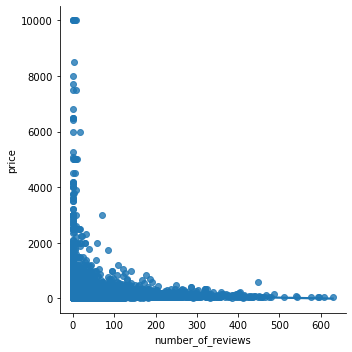

In [7]:
# Create a scatterplot for the number_of_reviews and price columns in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'price', data = df_2)

# Answer to Question 4 for 2nd scatterplot

The two variables have a strong non-linear relationship. 

# 6) Pair plots

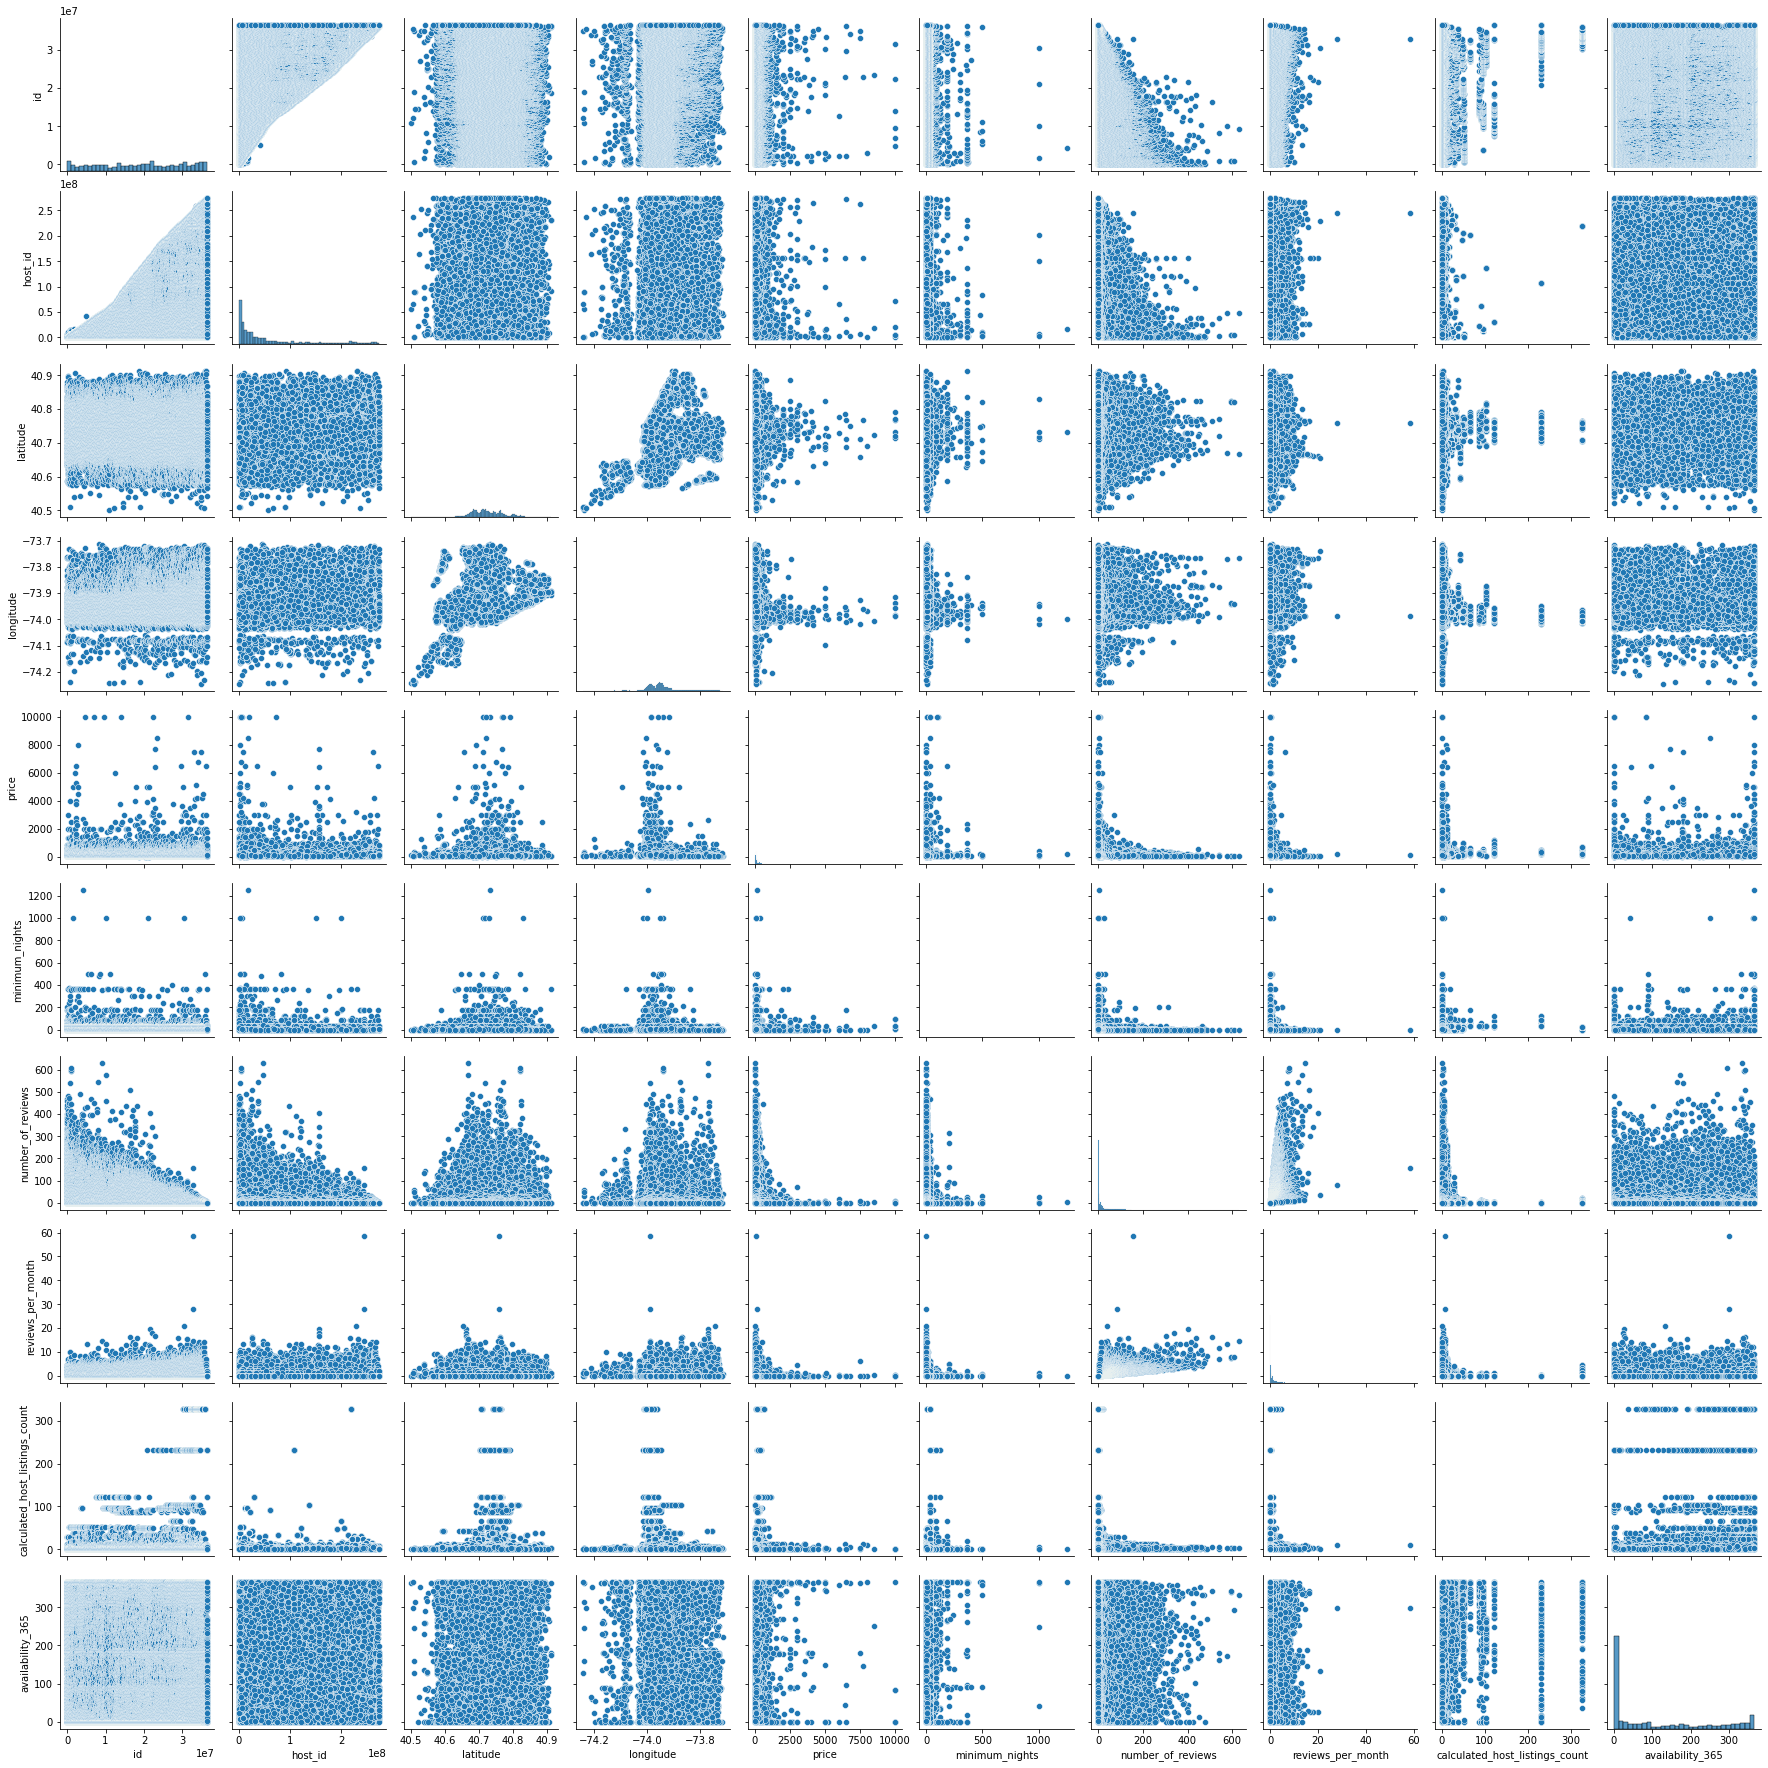

In [28]:
# Create a pair plot for the entire dataset

pair = sns.pairplot(df_clean)

In [10]:
# Keep only the variables you want to use in the pair plot

sub_2 = df_2[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count','availability_365']]

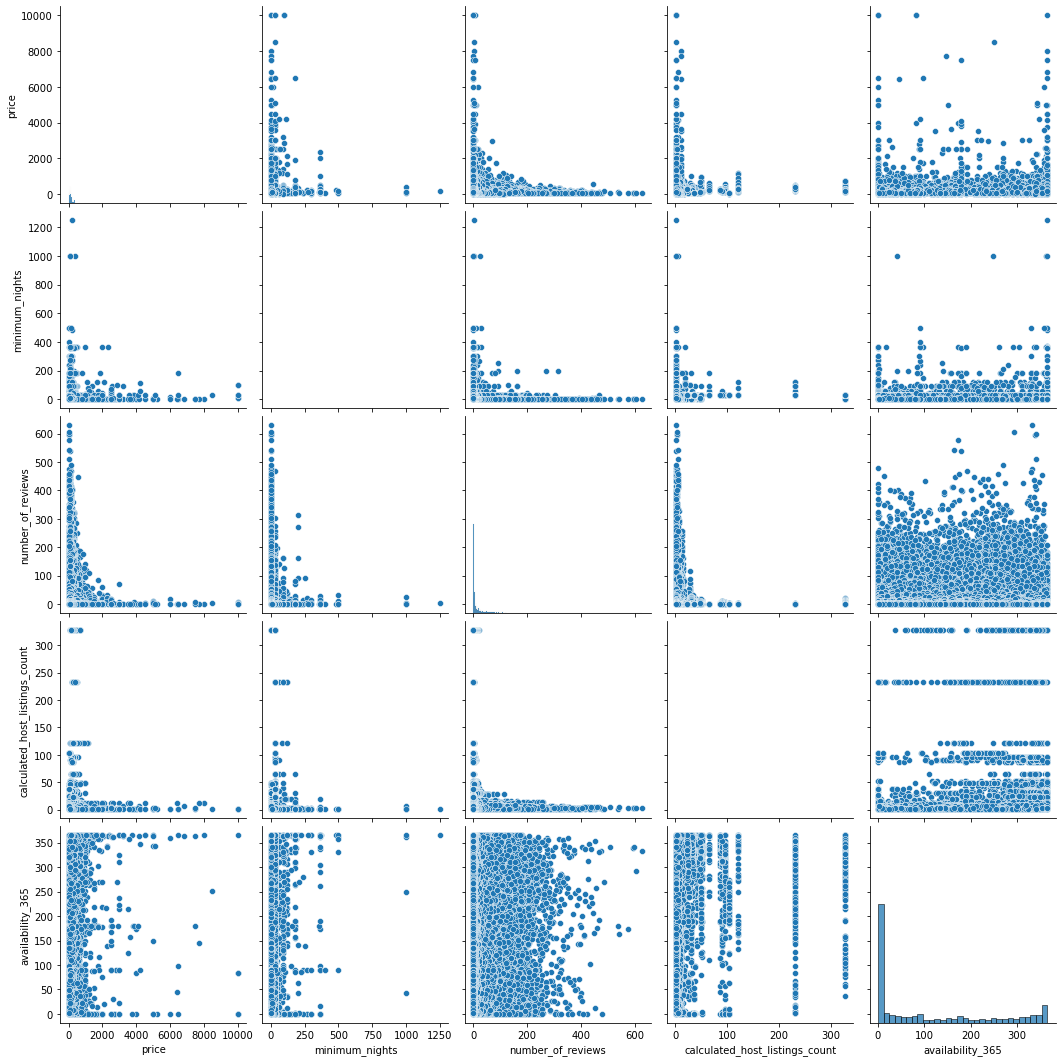

In [11]:
# Pair plots for relevant variables

pair_2 = sns.pairplot(sub_2, height = 3)

# Answer to Question 5

I selected only the relevant numeric columns because these are the variables that may have correlation when plotted. I would like to find out more about the relation of price to variables like number_of_reviews, minimum_nights, calculated_host_listings_count and availability_365. 

In [13]:
# To export pair_2 outside Jupyter

pair_2.figure.savefig(os.path.join(path,'pairplots.png'))

# 7) Categorical Plot

<AxesSubplot:xlabel='price', ylabel='Count'>

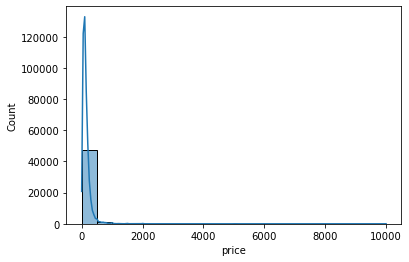

In [39]:
# Histogram to show the range of prices

sns.histplot(sub_2['price'], bins = 20, kde = True)

In [75]:
df_clean.loc[df_clean['price'] <= 300, 'Price category'] = 'Low price'

In [76]:
df_clean.loc[(df_clean['price'] >= 301) & (df_clean['price'] <= 1000), 'Price category'] = 'Mid price'

In [77]:
df_clean.loc[(df_clean['price'] >= 1001) & (df_clean['price'] <= 3000), 'Price category'] = 'High price'

In [78]:
df_clean.loc[df_clean['price'] >= 3001, 'Price category'] = 'Luxury price'

In [79]:
df_clean['Price category'].value_counts(dropna = False)

Low price       45538
Mid price        3118
High price        194
Luxury price       45
Name: Price category, dtype: int64

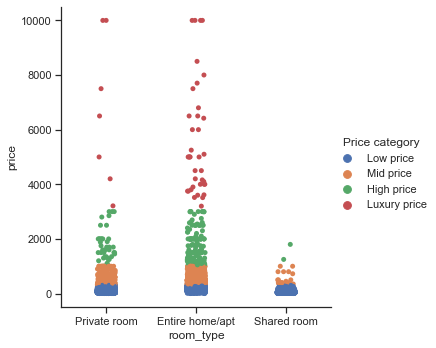

In [80]:
# Create a categorical plot in seaborn using the price categories 

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", hue="Price category", data=df_clean)

In [11]:
df_clean.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# 8) Insights

# Answer for Question 6

Although most of the listings are in the low to mid prices, it's interesting to note that there are high and luxury priced options for all property types. With this insight it's possible that the pricing is not determined by the just the size of the property.  

# Answers for Question 7

1)	Who are top 10 best and 10 least performing hosts? More analysis and exploration is needed for this.

2)	What are the possible factors that determine rental price? The size of the property could be a factor but there are definitely other factors that weigh in on this. 

3)	How do neighbourhoods compare? More analysis to answer this.

4)	What insights do we get from user reviews? More analysis on this but based on the correlation matrix the number of reviews on a property affects the occupancy of the property.

5)	What's the profile of AirBNB users in NYC? More analysis on this.

Additional questions:
    1) What type of property has the highest demand?
    
    2) Should there be price categories within each kind of property?
    
    3) Do the number of reviews affect the popularity of a property?


# Answer for Question 8

Null Hypothesis: Demand for a property is not affected by the number of reviews on the listing.
    
Alternative Hypothesis: A property with more reviews on the platform are gets higher demand than listings that do have a low number of reviews. 